In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('bike sharing dataset.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df.drop(['dteday'],axis=1,inplace=True)

In [6]:
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<Axes: >

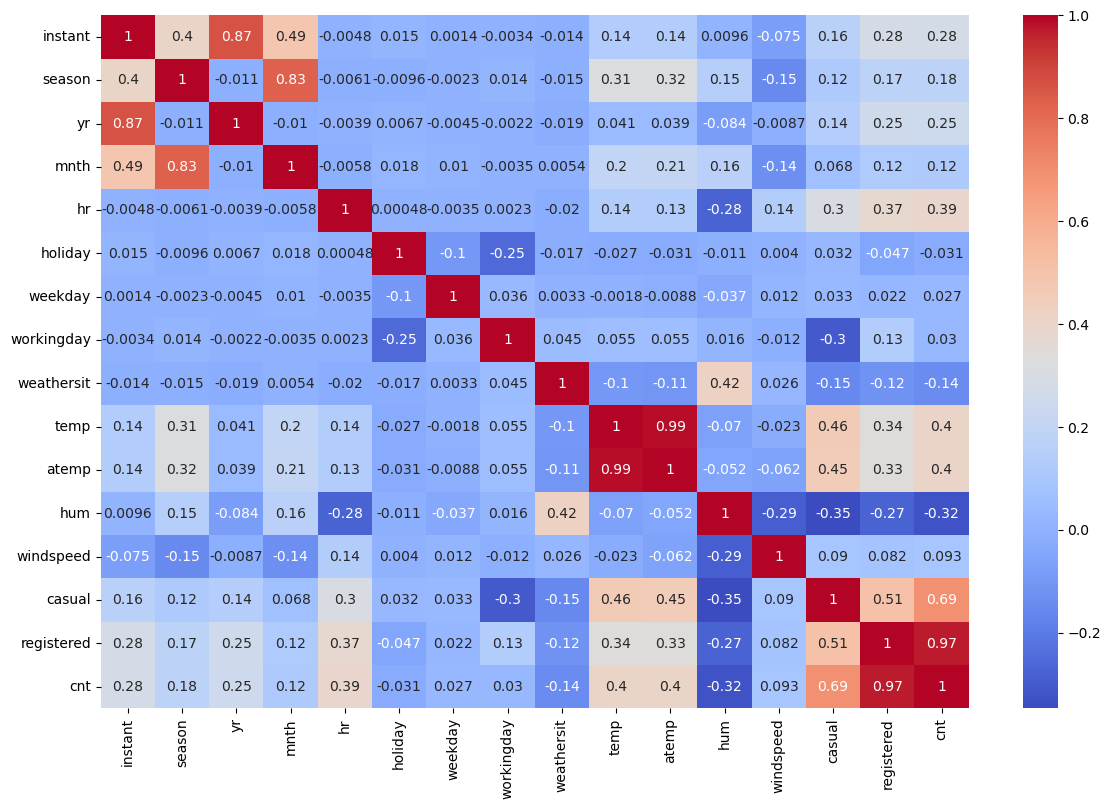

In [7]:
# display correlation matrix in heatmap
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Chi-Square (Categorical Attributes)

In [8]:
df = pd.read_csv('Loan Prediction Dataset.csv')
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [9]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [15]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [17]:
mutual_info_classif=mutual_info_classif(X, y)
mutual_info_classif

array([0.        , 0.        , 0.        , 0.01659897, 0.        ,
       0.15654196, 0.032016  ])

In [16]:
f_classif=f_classif(X, y)
f_classif

(array([1.98058690e-01, 5.16455172e+00, 6.26648861e-02, 4.54768458e+00,
        8.38037720e-03, 2.52652090e+02, 6.31733319e-01]),
 array([6.56449758e-01, 2.33983628e-02, 8.02416513e-01, 3.33606775e-02,
        9.27089984e-01, 7.01968203e-48, 4.27028351e-01]))

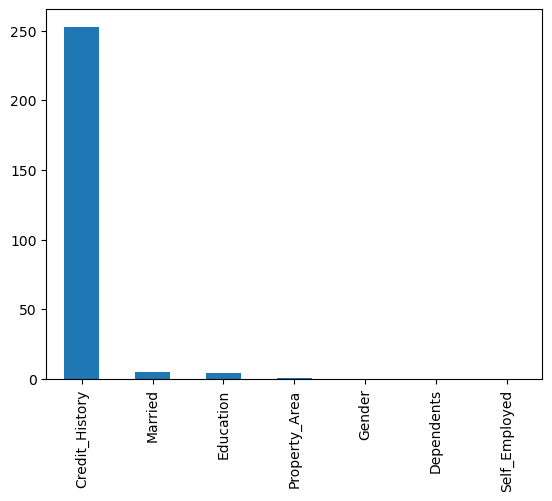

In [19]:
# higher the chi value, higher the importance
f_classif = pd.Series(f_classif[0], index=X.columns)
f_classif.sort_values(ascending=False, inplace=True)
f_classif.plot.bar()
plt.show()

In [11]:
chi_scores = chi2(X, y)

In [12]:
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

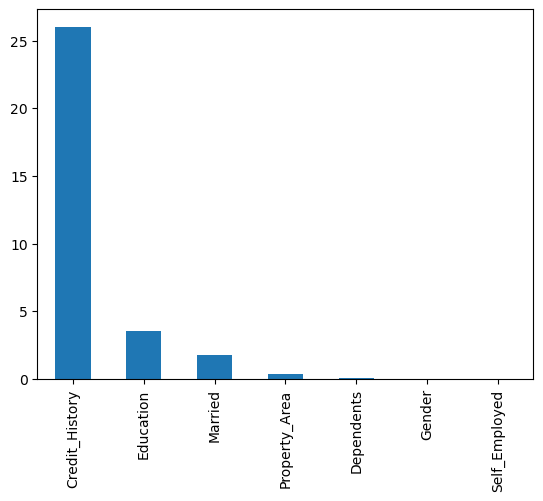

In [13]:
# higher the chi value, higher the importance
f_classif = pd.Series(chi_scores[0], index=X.columns)
f_classif.sort_values(ascending=False, inplace=True)
f_classif.plot.bar()
plt.show()

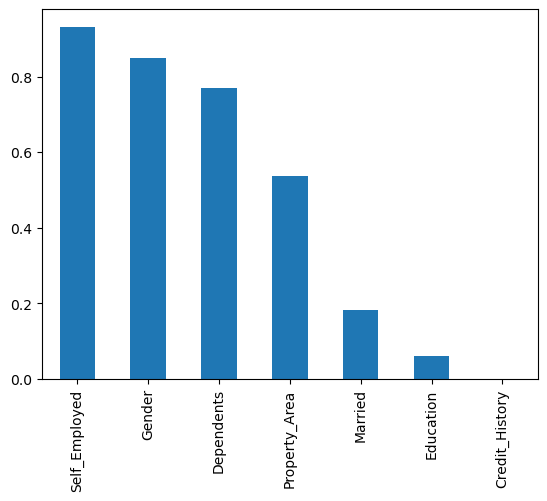

In [14]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()
plt.show()